In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook


In [2]:
import os
os.chdir('../')

In [3]:
import sys
sys.path.append('/home/njr61/rds/hpc-work/spurious-concepts/ConceptBottleneck')

In [4]:
import torch
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
import torch.nn as nn
import torch.optim as optim
import pickle
import matplotlib.pyplot as plt

In [5]:
from ConceptBottleneck.CUB.models import ModelXtoC, ModelOracleCtoY
from ConceptBottleneck.CUB.dataset import load_data

In [6]:
from src.images import *
from src.util import *

In [7]:
for dataset in ["CUB_small","CUB_blur","CUB_tag"]:
    for split in ["train","test","val"]:
        new_metadata(dataset,split)

<IPython.core.display.Javascript object>


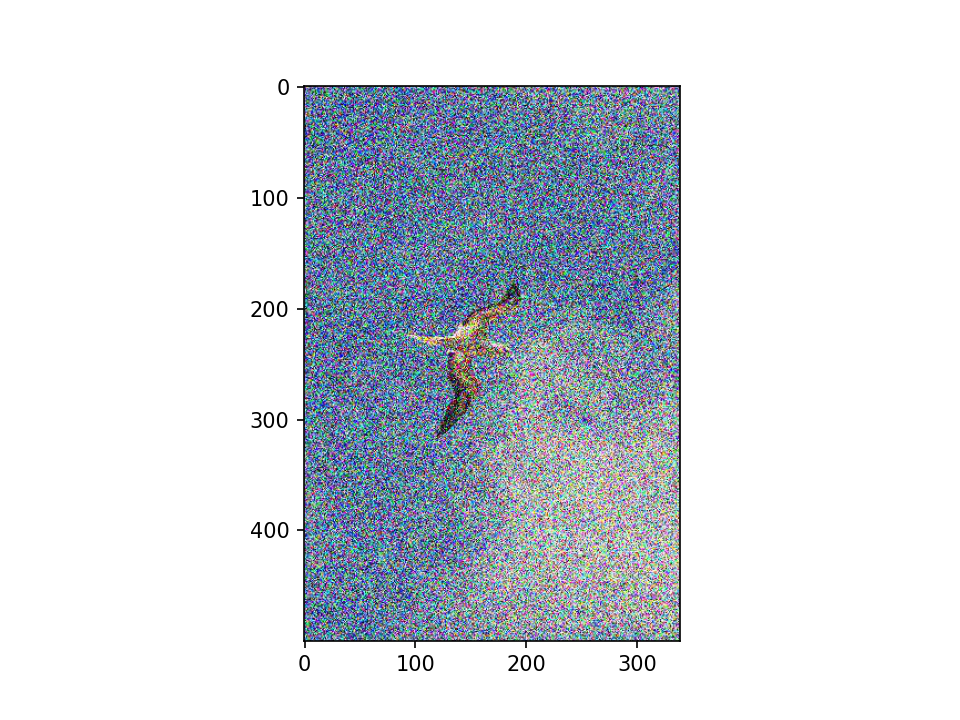

In [8]:
plt.imshow(plt.imread("../cem/cem/CUB_tag/images/CUB_200_2011/images/002.Laysan_Albatross/Laysan_Albatross_0001_545.jpg"))

In [9]:
pretrained = True
freeze = False
num_classes = 200
num_attributes = 13
use_aux = True
expand_dim = 0
three_class = False
use_attr = True
no_img = False
batch_size = 64
uncertain_labels = False
image_dir = 'images'
num_class_attr = 2
resampling = False

In [10]:
independent_location = "results/models/independent_chexpert.pth"
independent_model = torch.load(independent_location,map_location=torch.device('cpu'))

In [8]:
better_independent_location = "results/models/independent_chexpert_better.pth"
better_independent_model = torch.load(better_independent_location,map_location=torch.device('cpu'))

In [9]:
concept_location = "results/models/concept_chexpert.pth"
concept_model = torch.load(concept_location,map_location=torch.device('cpu'))

In [10]:
BASE_DIR = ""
data_dir = "../chest_dataset/metadata_no_uncertainty"

In [11]:
train_data_path = os.path.join(BASE_DIR, data_dir, 'train.pkl')
val_data_path = train_data_path.replace('train.pkl', 'val.pkl')

In [12]:
train_loader = load_data([train_data_path], use_attr, no_img, batch_size, uncertain_labels, image_dir=image_dir, 
                         n_class_attr=num_class_attr, resampling=resampling, path_transform=lambda path: "../chest_dataset/"+path)
val_loader = load_data([val_data_path], use_attr, no_img=True, batch_size=64, image_dir=image_dir, n_class_attr=num_class_attr, path_transform=lambda path: "../chest_dataset/"+path)

In [13]:
independent_model.eval()

MLP(
  (linear): Linear(in_features=13, out_features=128, bias=True)
  (activation): ReLU()
  (linear2): Linear(in_features=128, out_features=2, bias=True)
)

In [44]:
for _, i in enumerate(val_loader):
    c,y = i
    c = torch.stack(c).T

    probabilities = torch.softmax(independent_model.forward(c.float()), dim=1)[:,1]
    
    print(roc_auc_score(y,probabilities.detach().numpy()))
    
    if _ == 5:
        break

torch.Size([64]) torch.Size([64])
0.6986607142857143
torch.Size([64]) torch.Size([64])
0.7983870967741935
torch.Size([64]) torch.Size([64])
0.9249999999999999
torch.Size([64]) torch.Size([64])
0.8688524590163934
torch.Size([64]) torch.Size([64])
0.7049180327868853
torch.Size([64]) torch.Size([64])
0.7796610169491525


In [47]:
for _, i in enumerate(train_loader):
    x,y,c = i
    c = torch.stack(c).T
    
    a = concept_model(x)
    pred_c = (torch.stack(a[0]).T > 0).int()[0]
    
    probabilities = torch.softmax(better_independent_model.forward(pred_c.float()), dim=1)[:,1]
    print(roc_auc_score(y,probabilities.detach().numpy()))
    
    if _ == 5:
        break

0.700925925925926
0.7677966101694915
0.7541666666666667
0.6102756892230576
0.7581453634085213
0.6861111111111112


In [22]:
a = concept_model(x)

In [42]:
c = (torch.stack(a[0]).T > 0).int()

In [ ]:
for _, i in enumerate(val_loader):
    c,y = i
    c = torch.stack(c).T

    probabilities = torch.softmax(better_independent_model.forward(c.float()), dim=1)[:,1]
    print(roc_auc_score(y,probabilities.detach().numpy()))
    
    if _ == 5:
        break

In [31]:
for _,i in enumerate(val_loader):
    if _ > 10:
        c,y = i
        print(len(c),len(y))
        c = torch.stack(c).T.float()

        prediction_new = better_independent_model(c)

        print("AUC {}".format(roc_auc_score(y,prediction_new[:,1].detach().numpy())))
        
        if _ == 15:
            break

13 64
AUC 0.6587301587301587
13 64
AUC 0.6398148148148148
13 64
AUC 0.6881355932203389
13 64
AUC 0.7270833333333333
13 64
AUC 0.5916666666666667


In [18]:
better_independent_model(inputs) == better_independent_model(c.float()) 

tensor([[True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [T

In [22]:
independent_model(c.float())

tensor([[ 0.3187, -0.3172],
        [ 0.2216, -0.5912],
        [ 0.2634, -0.2715],
        [ 0.3241, -0.4338],
        [ 0.3241, -0.4338],
        [ 0.3187, -0.3172],
        [ 0.2375, -0.1929],
        [ 0.3465, -0.3641],
        [ 0.1988, -0.4229],
        [ 0.2916, -0.3227],
        [ 0.2437, -0.3450],
        [ 0.2634, -0.2715],
        [ 0.3930, -0.4389],
        [ 0.2476, -0.3226],
        [ 0.3608, -0.4216],
        [ 0.1927, -0.5018],
        [ 0.1927, -0.5018],
        [ 0.3197, -0.2827],
        [ 0.3197, -0.2827],
        [ 0.3197, -0.2827],
        [ 0.2102, -0.2647],
        [ 0.3199, -0.4060],
        [ 0.1482, -0.5372],
        [ 0.2102, -0.2647],
        [ 0.3148, -0.2486],
        [ 0.3370, -0.3175],
        [ 0.1956, -0.5574],
        [ 0.2132, -0.1499],
        [ 0.2922, -0.6022],
        [ 0.2132, -0.1499],
        [ 0.3187, -0.6980],
        [ 0.2132, -0.1499],
        [ 0.3148, -0.2486],
        [ 0.3148, -0.2486],
        [ 0.2476, -0.3226],
        [ 0.2634, -0

In [35]:
probabilities = torch.softmax(independent_model.forward(c.float()), dim=1)[:,1]
probabilities

tensor([0.4049, 0.3596, 0.3462, 0.3021, 0.3940, 0.4127, 0.4049, 0.3191, 0.3163,
        0.3538, 0.3749, 0.3940, 0.4049, 0.3538, 0.3612, 0.3076, 0.3612, 0.3462,
        0.3612, 0.3612, 0.2777, 0.3487, 0.2841, 0.3757, 0.3462, 0.3090, 0.3203,
        0.4049, 0.3073, 0.3202, 0.3606, 0.3462, 0.3311, 0.2952, 0.3121, 0.3141,
        0.3757, 0.3612, 0.3330, 0.2777, 0.3235, 0.3457, 0.3550, 0.3462, 0.3295,
        0.3416, 0.3462, 0.3835, 0.4049, 0.4049, 0.3646, 0.4127, 0.3612, 0.3410,
        0.3386, 0.4049, 0.3163, 0.3612, 0.3457, 0.3163, 0.3073, 0.3163, 0.3415,
        0.3462], grad_fn=<SelectBackward0>)

In [39]:
roc_auc_score(y,probabilities.detach().numpy())

0.7894736842105263

In [16]:
for i in train_loader:
    x,y,c = i
    c = torch.stack(c).T
    break

In [38]:
mlp = MLPClassifier(hidden_layer_sizes=(128,),alpha=0)

In [39]:
mlp.fit(c,y)

/rds/user/njr61/hpc-work/anaconda3/envs/cem/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(alpha=0, hidden_layer_sizes=(128,))

In [40]:
for _, i in enumerate(val_loader):
    x,y,c = i
    c = torch.stack(c).T

    probabilities = mlp.predict_proba(c.float().detach().numpy())[:,1]
    print(roc_auc_score(y,probabilities))
    
    if _ == 5:
        break

0.9665178571428571
0.9758064516129032
0.9916666666666666
0.9617486338797814
0.9617486338797814
0.9898305084745763


## Try to train an MLP from scratch

In [24]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(13, 128)
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [46]:
model = MLP()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [47]:
loss_fn = nn.BCEWithLogitsLoss()

In [48]:
model

MLP(
  (fc1): Linear(in_features=13, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)

In [49]:
for epoch in range(20):
    # Set the model to training mode
    model.train()
    # Loop over the training data
    for _, data in enumerate(train_loader):
        print("On {} out of 20".format(_))
        if _ > 20:
            break
        
        x, y, c = data
        c = torch.stack(c).T.float()
        
        targets = y.view(-1, 1)
        targets = torch.cat([1 - targets, targets], dim=1).float()
        
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(c)
        
        # Compute the loss
        loss = loss_fn(outputs, targets)
                
        probabilities = loss

        # Backward pass and optimization step
        loss.backward()
        optimizer.step()
        
    
    for i in val_loader:
        x,y,c = i
        c = torch.stack(c).T.float()
        
        prediction_ours = torch.softmax(independent_model.forward(c.float()), dim=1)[:,1]
        prediction_new = model(c)
        
        print("AUC, ours {}, theirs {}".format(
            roc_auc_score(y,prediction_ours.detach().numpy()),
            roc_auc_score(y,prediction_new[:,1].detach().numpy())))
        break


On 0 out of 20
On 1 out of 20
On 2 out of 20
On 3 out of 20
On 4 out of 20
On 5 out of 20
On 6 out of 20
On 7 out of 20
On 8 out of 20
On 9 out of 20
On 10 out of 20
On 11 out of 20
On 12 out of 20
On 13 out of 20
On 14 out of 20
On 15 out of 20
On 16 out of 20
On 17 out of 20
On 18 out of 20
On 19 out of 20
On 20 out of 20
On 21 out of 20
AUC, ours 0.6986607142857143, theirs 0.8883928571428571
On 0 out of 20
On 1 out of 20
On 2 out of 20
On 3 out of 20
On 4 out of 20
On 5 out of 20
On 6 out of 20
On 7 out of 20
On 8 out of 20
On 9 out of 20
On 10 out of 20
On 11 out of 20
On 12 out of 20
On 13 out of 20
On 14 out of 20
On 15 out of 20
On 16 out of 20
On 17 out of 20
On 18 out of 20
On 19 out of 20
On 20 out of 20
On 21 out of 20
AUC, ours 0.6986607142857143, theirs 0.8883928571428571
On 0 out of 20
On 1 out of 20
On 2 out of 20
On 3 out of 20
On 4 out of 20
On 5 out of 20
On 6 out of 20
On 7 out of 20
On 8 out of 20
On 9 out of 20
On 10 out of 20
On 11 out of 20
On 12 out of 20
On 13 

KeyboardInterrupt: 

In [50]:
for _, i in enumerate(val_loader):
    x,y,c = i
    c = torch.stack(c).T

    probabilities = torch.softmax(model.forward(c.float()), dim=1)[:,1]
    print(roc_auc_score(y,probabilities.detach().numpy()))
    
    if _ == 5:
        break

0.9665178571428571
0.9758064516129032
0.9916666666666666
0.9617486338797814
0.9617486338797814
0.9898305084745762


## Write full CUB Model outputs

In [7]:
dataset = "chexpert"

In [8]:
model_location = "ConceptBottleneck/results/{}/best_model_42.pth".format(dataset)

In [9]:
BASE_DIR = ""
data_dir = "../cem/cem/{}/preprocessed/".format(dataset)
train_data_path = os.path.join(BASE_DIR, data_dir, 'train.pkl')
val_data_path = train_data_path.replace('train.pkl', 'val.pkl')
test_data_path = train_data_path.replace('train.pkl', 'test.pkl')

In [10]:
pretrained = True
freeze = False
use_aux = True
expand_dim = 0
three_class = False
use_attr = True
no_img = False
batch_size = 64
uncertain_labels = False
image_dir = 'images'
num_class_attr = 2
resampling = False


In [11]:
train_loader = load_data([train_data_path], use_attr, no_img, batch_size, uncertain_labels, image_dir=image_dir, 
                         n_class_attr=num_class_attr, resampling=resampling, path_transform=lambda path: "../cem/cem/"+path, is_training=False)
val_loader = load_data([val_data_path], use_attr, no_img=False, batch_size=64, image_dir=image_dir, n_class_attr=num_class_attr, path_transform=lambda path: "../cem/cem/"+path)
test_loader = load_data([test_data_path], use_attr, no_img=False, batch_size=64, image_dir=image_dir, n_class_attr=num_class_attr, path_transform=lambda path: "../cem/cem/"+path)


In [12]:
model = torch.load(model_location,map_location=torch.device('cpu'))
r = model.eval()

In [13]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

In [14]:
all_outputs = []
for data in train_loader:
    x,y,c = data
    output = torch.stack(model.forward(x)).T[0].detach().numpy()
    all_outputs.append(output)
train_preds = np.concatenate(all_outputs)
train_preds = sigmoid(train_preds)

/rds/user/njr61/hpc-work/anaconda3/envs/cem/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2981.)
  after removing the cwd from sys.path.


In [15]:
all_outputs = []
for data in val_loader:
    x,y,c = data
    output = torch.stack(model.forward(x)).T[0].detach().numpy()
    all_outputs.append(output)
val_preds = np.concatenate(all_outputs)
val_preds = sigmoid(val_preds)

In [16]:
all_outputs = []
for data in test_loader:
    x,y,c = data
    output = torch.stack(model.forward(x)).T[0].detach().numpy()
    all_outputs.append(output)
test_preds = np.concatenate(all_outputs)
test_preds = sigmoid(test_preds)

In [17]:
train_preds.shape, val_preds.shape, test_preds.shape

((4000, 13), (1000, 13), (1000, 13))

In [18]:
np.save(open("ConceptBottleneck/results/{}/train_c.npy".format(dataset),"wb"),train_preds)

In [19]:
np.save(open("ConceptBottleneck/results/{}/valid_c.npy".format(dataset),"wb"),val_preds)

In [20]:
np.save(open("ConceptBottleneck/results/{}/test_c.npy".format(dataset),"wb"),test_preds)

In [22]:
test_preds[0]

array([3.1996213e-03, 9.1458923e-01, 2.6032645e-03, 8.5119274e-04,
       2.0728074e-03, 1.1626447e-01, 2.5096655e-04, 3.8872913e-01,
       2.3510065e-02, 1.3089442e-03, 2.5992107e-03, 2.5940591e-01,
       5.7240360e-04, 6.7264056e-01, 2.9322352e-02, 8.6640439e-04,
       7.5968582e-04, 6.7549452e-02, 4.2202543e-03, 1.1721804e-02,
       5.7617313e-01, 1.5272690e-03, 9.0443546e-01, 4.2516211e-04,
       8.6336309e-04, 3.3037733e-02, 1.8420018e-01, 8.2315551e-04,
       3.3096474e-02, 6.5469639e-03, 3.6346479e-04, 2.5074985e-03,
       2.9533415e-03, 9.1672726e-02, 6.3374951e-02, 8.3319368e-03,
       2.4741478e-03, 7.1852357e-04, 1.4241670e-01, 2.5989360e-03,
       6.4022983e-03, 1.2796567e-03, 1.1133913e-02, 7.0505095e-01,
       2.3352392e-03, 1.5518899e-03, 1.6411865e-03, 2.2973651e-01,
       7.4269760e-01, 5.9562788e-04, 9.9573082e-01, 9.8992527e-01,
       2.3965689e-03, 6.4660556e-04, 3.7313548e-03, 2.4660456e-03,
       1.1615532e-03, 3.0397967e-01, 1.4295523e-01, 3.0697361e

In [16]:
np.std(val_preds-true_npy)

0.0001904218

In [15]:
true_npy = np.load(open("ConceptBottleneck/valid_c.npy","rb"))

In [50]:
true_npy[0]

array([1.19471848e-01, 9.51446444e-02, 1.16605368e-02, 9.10848088e-04,
       1.78478367e-03, 7.40521103e-02, 9.14278673e-04, 7.18506519e-03,
       9.50378180e-01, 1.62807130e-03, 2.34337081e-03, 7.43445083e-02,
       3.48532829e-03, 1.72525328e-02, 9.96374428e-01, 2.55531329e-03,
       6.46938104e-03, 1.03192963e-03, 2.38617836e-03, 1.52403405e-02,
       9.88893449e-01, 1.31908501e-03, 9.95348752e-01, 1.28266215e-03,
       4.25518071e-03, 1.85262365e-03, 1.02271318e-01, 6.59892056e-03,
       7.65123731e-03, 9.89341199e-01, 2.57955445e-03, 2.65727961e-03,
       3.39705124e-03, 4.91682775e-02, 8.83342698e-02, 9.54828978e-01,
       3.71946371e-03, 2.87708524e-03, 6.56993568e-01, 2.08897190e-03,
       1.11130439e-03, 2.38005025e-03, 6.29754551e-03, 9.80403185e-01,
       1.00825331e-03, 1.20618509e-03, 1.21480809e-03, 6.53224206e-03,
       9.87762451e-01, 1.38192845e-03, 9.98623013e-01, 9.83387709e-01,
       4.73612407e-03, 5.65876998e-03, 1.02525926e-03, 1.30164786e-03,
      

array([[ -1.9950466 ,  -2.2551203 ,  -4.4401274 , ...,  -5.584211  ,
         -5.8710384 ,  -3.0432527 ],
       [  5.0180492 ,  -5.2271686 ,  -5.977518  , ...,  -6.3092246 ,
         -6.5245175 ,   5.21134   ],
       [ -6.7221255 ,  -5.3326626 ,   2.9254909 , ...,  -5.836156  ,
         -7.241572  ,  -3.0484724 ],
       ...,
       [ -9.36027   ,  -8.780856  ,  -5.5173116 , ..., -13.220712  ,
         -8.309656  ,  -4.3619347 ],
       [ -2.8737493 ,  -5.8745036 ,   2.4273636 , ...,  -2.698057  ,
         -2.9726756 ,  -4.0423875 ],
       [ -6.3583803 ,  -6.6875196 ,  -2.3348837 , ...,  -6.575341  ,
         -5.61813   ,  -0.64097655]], dtype=float32)